# TOPIC:CENSUS-INCOME PREDICTION

### SOORAJ ARUN

## ORGANIZATION: ENTRI ELEVATE

## Date:03/02/2025

# Overview of the problem statement

The Census Income Dataset, obtained from the UCI Machine Learning Repository, is a publicly available dataset designed to predict whether an individual's income exceeds $50,000 per year based on various demographic and employment attributes. It contains 32,561 rows and 15 attributes, including both categorical and numerical features, such as age, workclass, education level, marital status, occupation, race, gender, hours worked per week, and more. The dataset also includes two derived numerical variables: capital-gain and capital-loss, which reflect additional financial details about individuals.

The target variable is income, categorized into two classes: <=50K and >50K, making this a binary classification problem. This dataset is widely used in machine learning for classification tasks, exploratory data analysis (EDA), and feature engineering exercises.

# Objective

The primary objective of the Census Income Dataset is to predict whether an individual's annual income exceeds $50,000 based on a combination of demographic and employment-related attributes. By leveraging features such as age, education, marital status, occupation, race, gender, and hours worked per week, the dataset aims to explore the socio-economic factors influencing income levels. This enables the development of machine learning classification models to accurately categorize individuals into income brackets (<=50K or >50K).

## Data Description

## SOURCE:UCI Machine Learning Repository
## Data Size: 32,561 rows and 15 columns.
## features:
1.age (Numerical)
2.workclass (Categorical): 
3.fnlwgt (Numerical): 
4.education (Categorical): 
5.education-num (Numerical): 
6.marital-status (Categorical): 
7.occupation (Categorical): 
8.relationship (Categorical): 
9.race (Categorical): 
10.sex (Categorical): 
11.capital-gain (Numerical): 
12.capital-loss (Numerical): 
13.hours-per-week (Numerical): 
14.native-country (Categorical): 
15. Target Variable:
income (Categorical): Binary classification target variable indicating whether the individual’s income is:<=50K: Income is less than or equal to $50,000.
          >50K: Income is greater than $50,000.

## Missing/Unknown Data: Some categorical features include "?" as placeholders for missing values, particularly in workclass, occupation, and native-country.



## IMPORTING LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif,chi2
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_auc_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
import warnings
warnings.filterwarnings("ignore")# to prevent warning msgs

## DATA COLLECTION

In [14]:
print("\nCollecting Data...")

In [15]:
data=pd.read_csv('census_income.csv')
print("\nDataset Loaded Successfully....")
data



Dataset Loaded Successfully....


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
census_df=pd.DataFrame(data) #covert into dataframe

In [17]:
census_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## BASIC STATISTICS:

In [19]:
print("\nDATASET SIZE:")
census_df.shape


DATASET SIZE:


(32561, 15)

In [20]:
print("\n Basic Statistics:")
census_df.info()


 Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## DATA CLEANING

In [23]:
census_df.isnull().sum() #Finding missing values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
census_df.replace('?', np.nan, inplace=True) #handling unwanted symbols in missing area and its replaced into nan 

In [25]:
census_df.isnull().sum() #after replacement find missing values again

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [26]:
#missing values are located in categorical columns
# Identify categorical columns in the dataset
categorical_columns = census_df.select_dtypes(include='object').columns

# Fill missing values in each categorical column with the mode (most frequent value)
for col in categorical_columns:
    if census_df[col].isnull().sum() > 0:  # Only process columns with missing values
        census_df[col].fillna(census_df[col].mode()[0], inplace=True)

# Optional: Print confirmation of completed operation
print("Missing values in categorical columns handled successfully.")


Missing values in categorical columns handled successfully.


In [27]:
census_df.isnull().sum() # handling missing values recheck the datset

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [28]:
census_df.duplicated().sum() #finf duplicates

24

In [29]:
census_df = census_df.drop_duplicates() #handling duplicates

In [30]:
print(f"Shape after removing duplicates: {census_df.shape}")

Shape after removing duplicates: (32537, 15)


In [31]:
census_df.duplicated().sum()

0

In [32]:
numeric_columns = census_df.select_dtypes(include=['number']) #finf numeric columns

In [33]:
print("\nNumerical Columns:",numeric_columns)



Numerical Columns:        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]


# Outliers Detection

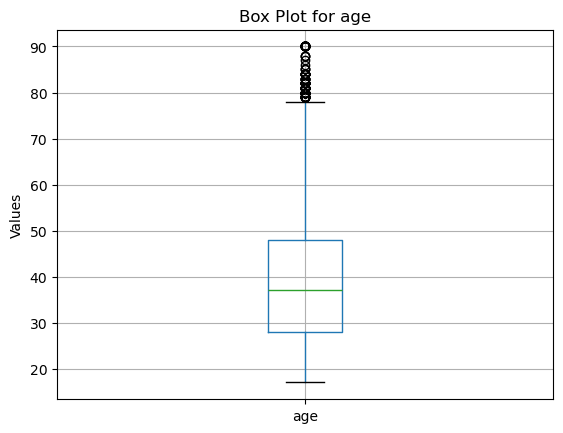

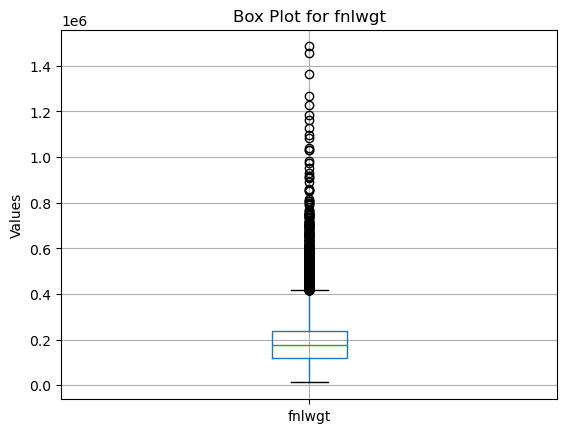

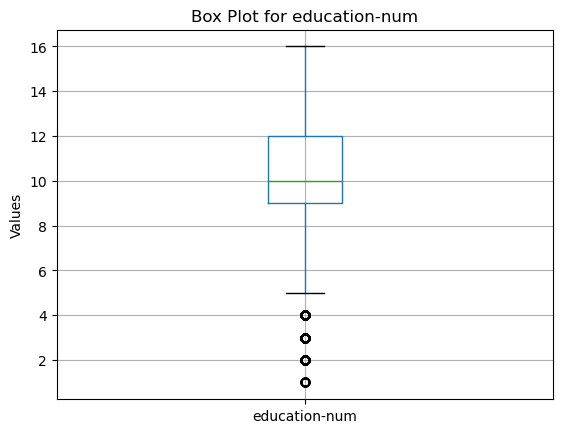

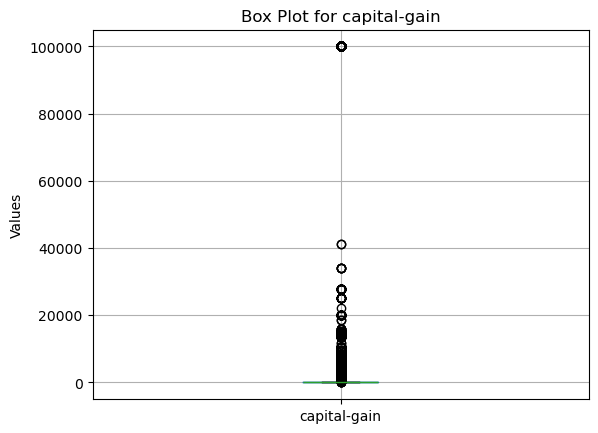

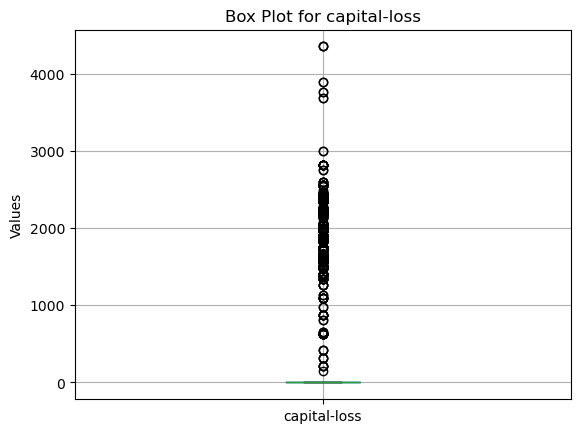

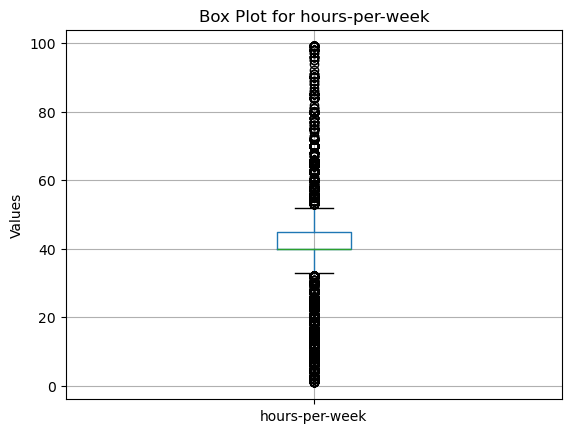

In [35]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.boxplot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

# OUTLINERS REMOVAL

In [37]:
def handle_outliers_iqr(df):
    # Iterate over all numeric columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate the IQR, lower and upper bounds
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR  # Lower limit
        upper = Q3 + 1.5 * IQR  # Upper limit

        # Apply capping (Winsorizing) to cap values beyond bounds
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df


# Apply the function to handle outliers in the dataset
census_df1 = handle_outliers_iqr(census_df)

# Verify the result
print(f"Shape of the DataFrame after handling outliers: {census_df1.shape}")
   

Shape of the DataFrame after handling outliers: (32537, 15)


In [38]:
census_df1.head

<bound method NDFrame.head of         age         workclass    fnlwgt   education  education-num  \
0      39.0         State-gov   77516.0   Bachelors           13.0   
1      50.0  Self-emp-not-inc   83311.0   Bachelors           13.0   
2      38.0           Private  215646.0     HS-grad            9.0   
3      53.0           Private  234721.0        11th            7.0   
4      28.0           Private  338409.0   Bachelors           13.0   
...     ...               ...       ...         ...            ...   
32556  27.0           Private  257302.0  Assoc-acdm           12.0   
32557  40.0           Private  154374.0     HS-grad            9.0   
32558  58.0           Private  151910.0     HS-grad            9.0   
32559  22.0           Private  201490.0     HS-grad            9.0   
32560  52.0      Self-emp-inc  287927.0     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-i

In [39]:
# After outliers handling

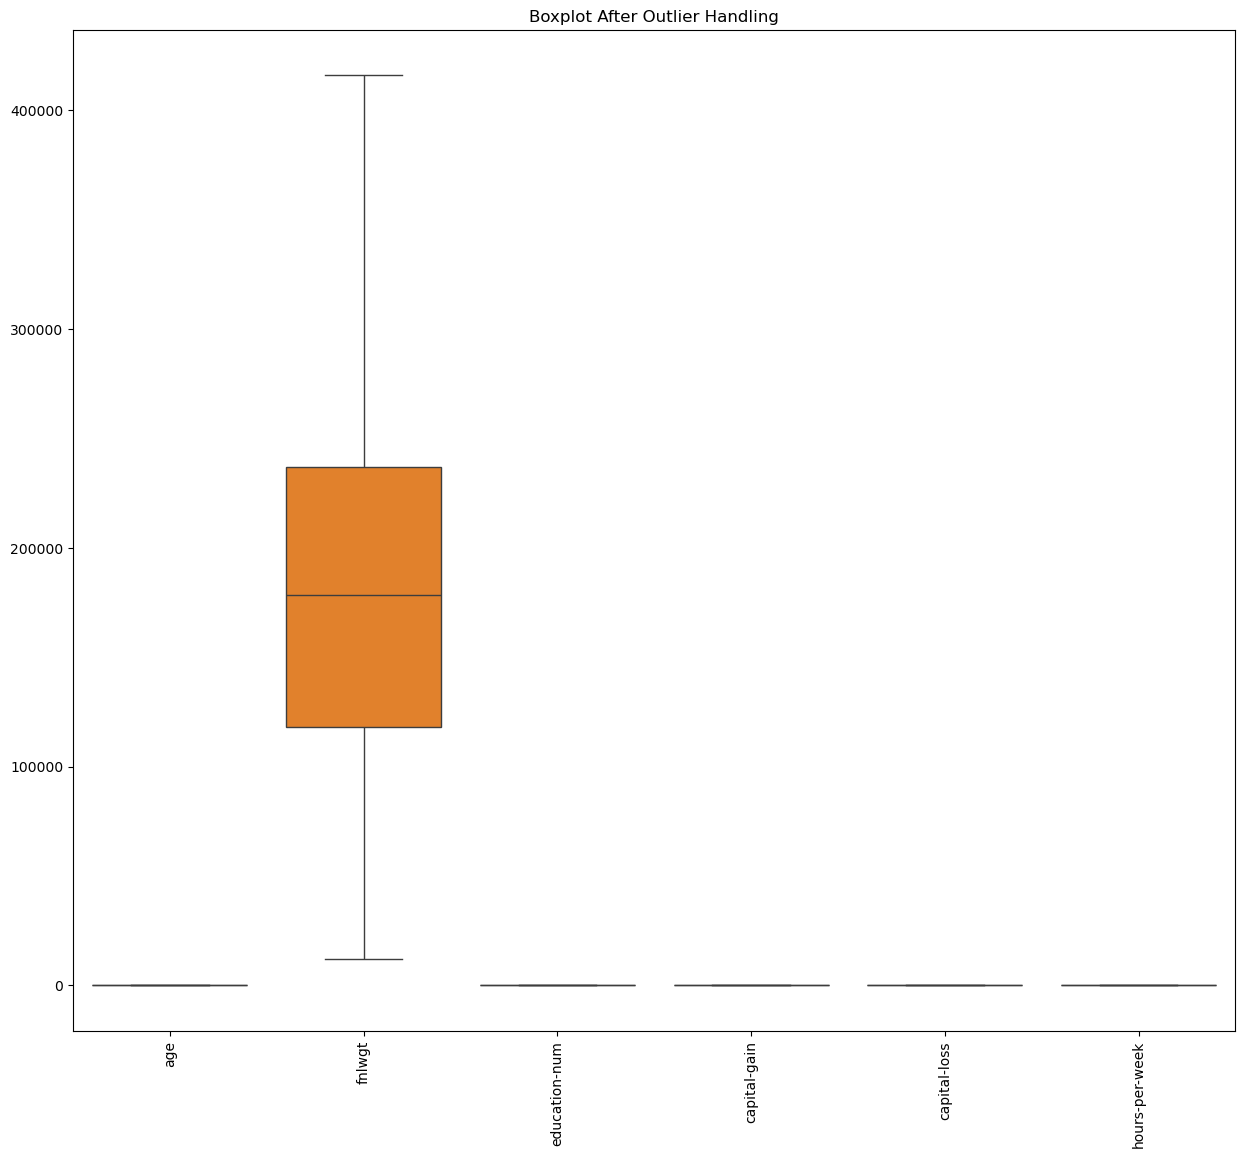

In [40]:
plt.figure(figsize=(15,13))
sns.boxplot(data=census_df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=90)

plt.show()

In [41]:
census_df1=census_df1.drop('fnlwgt',axis=1)

In [42]:
census_df1

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,32.5,United-States,<=50K


# HANDLING SKEWNESS

In [44]:
# Check skewness of numerical columns
numerical_features = census_df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(census_df1[numerical_features].skew())

age               0.513435
education-num    -0.033530
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.438212
dtype: float64


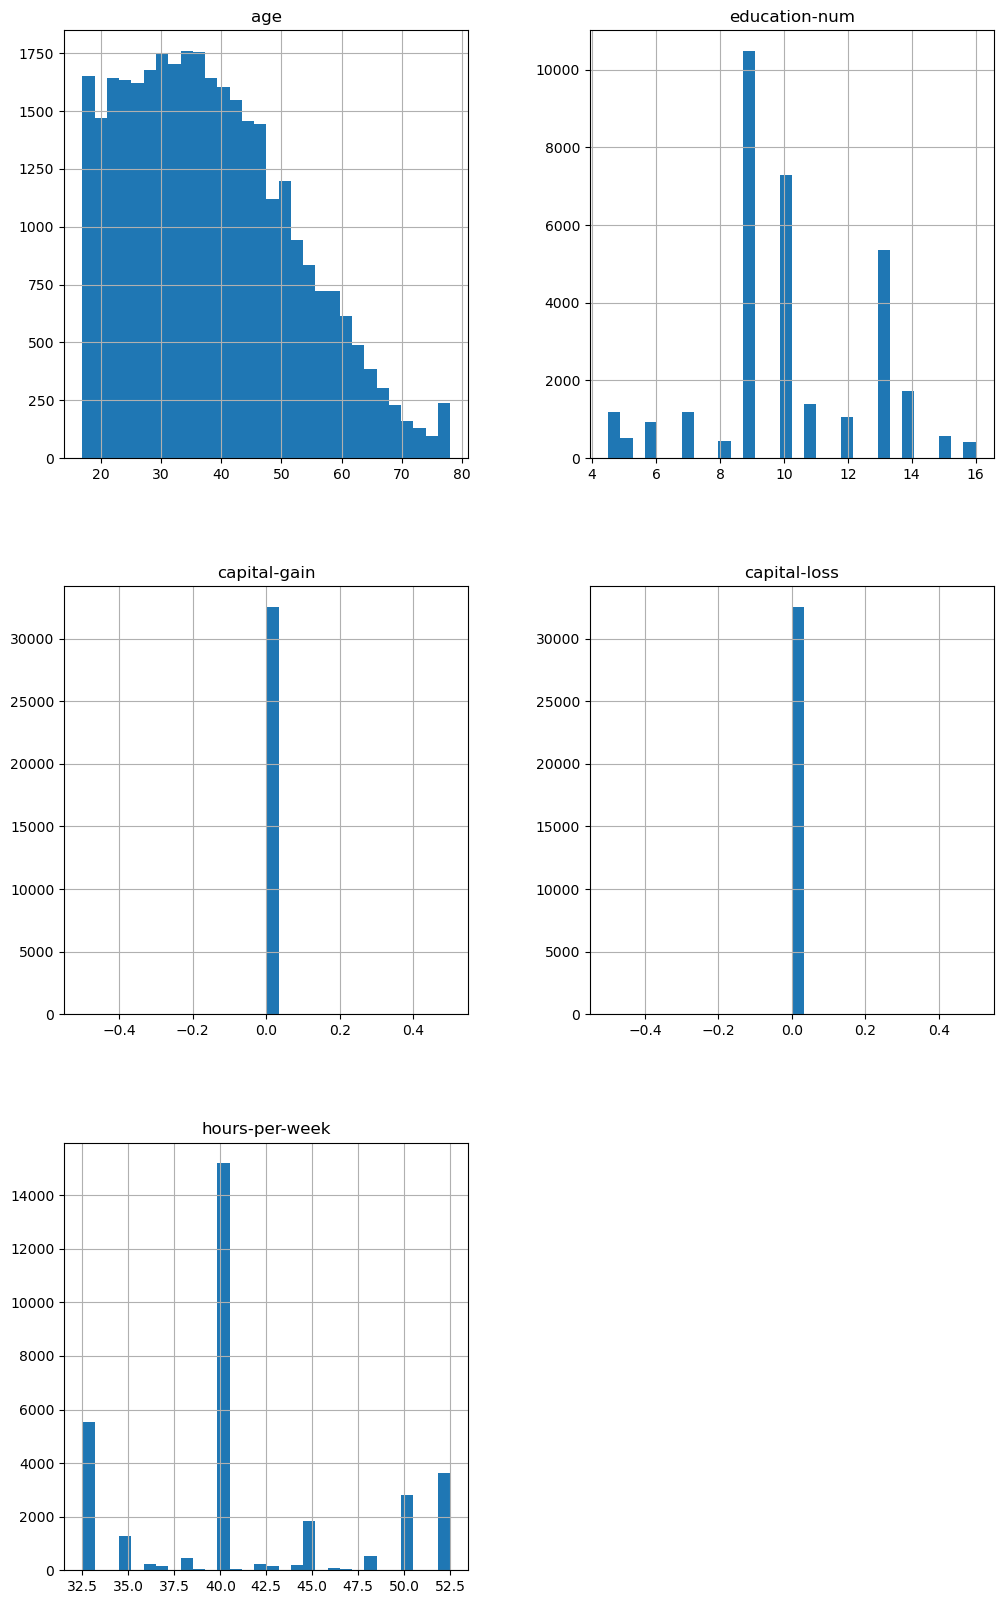

In [45]:
# Plot histograms before transformed features
census_df1.hist(figsize=(12, 20), bins=30)
plt.show()

In [46]:
pt = PowerTransformer(method='yeo-johnson')
census_df1[numerical_features] = pt.fit_transform(census_df1[numerical_features])

print(census_df1[numerical_features].skew())

age              -0.016412
education-num    -0.001633
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.020163
dtype: float64


<Axes: ylabel='Density'>

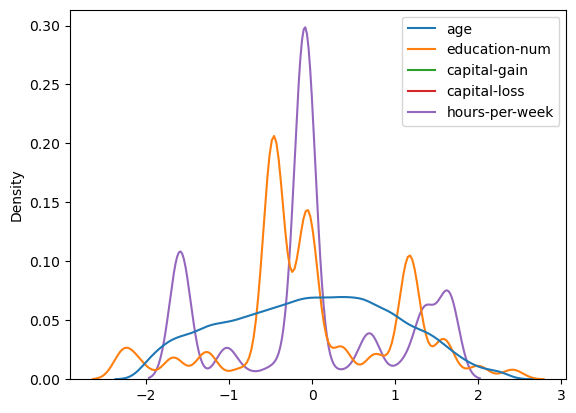

In [47]:
sns.kdeplot(census_df1)

## Exploratory Data Analysis (EDA)

<Figure size 640x480 with 0 Axes>

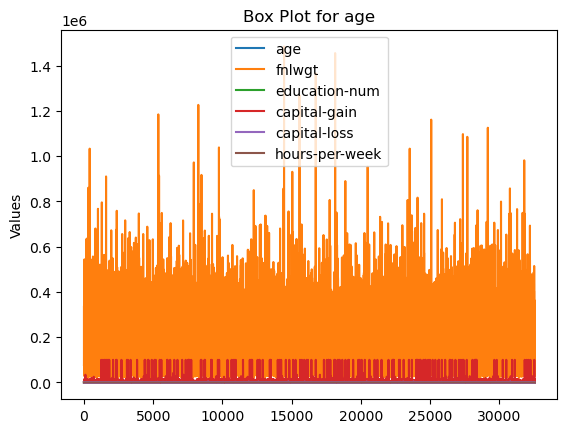

<Figure size 640x480 with 0 Axes>

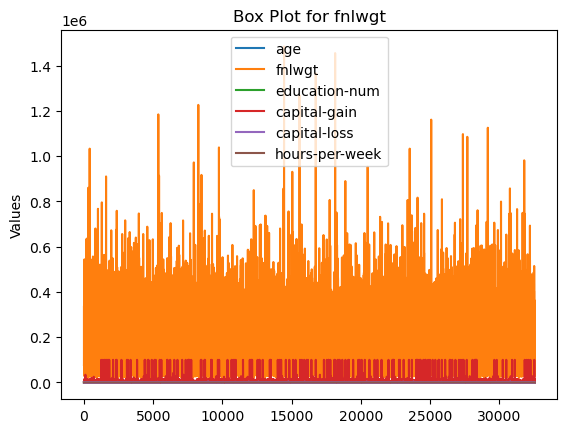

<Figure size 640x480 with 0 Axes>

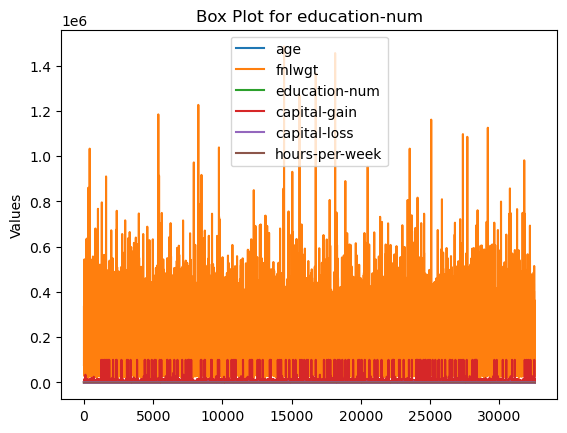

<Figure size 640x480 with 0 Axes>

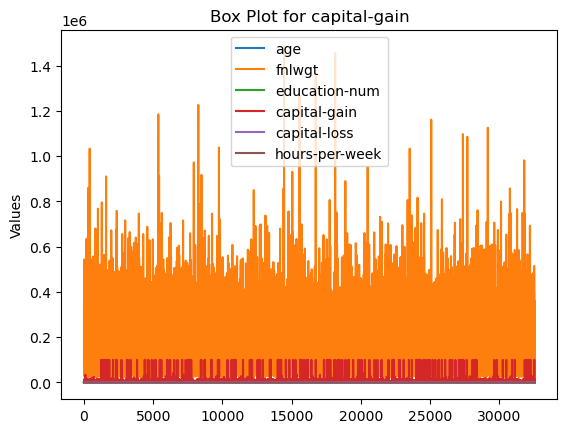

<Figure size 640x480 with 0 Axes>

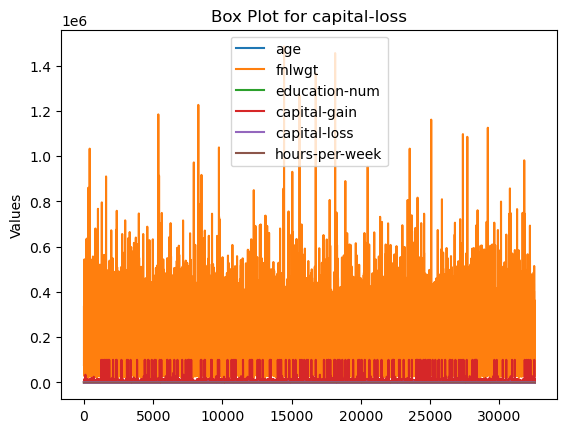

<Figure size 640x480 with 0 Axes>

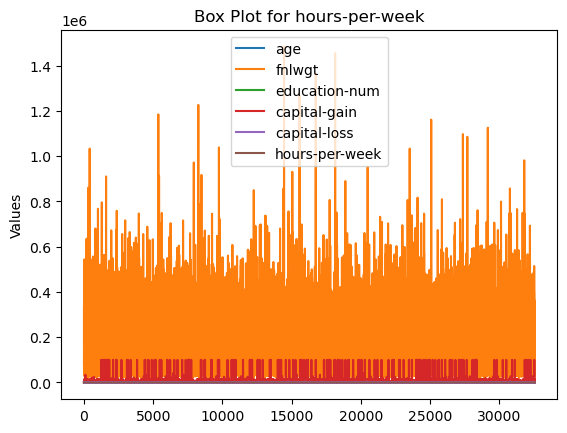

In [49]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.plot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

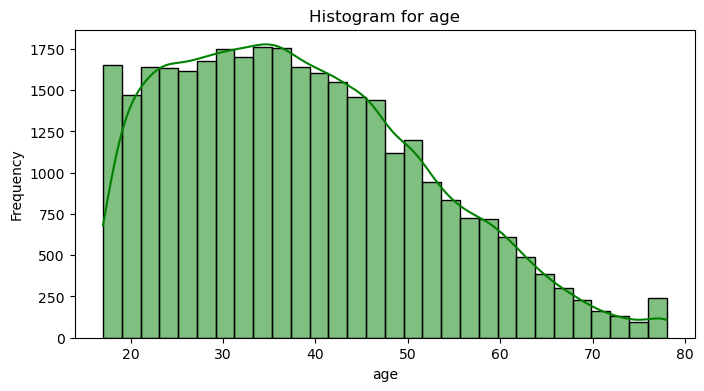

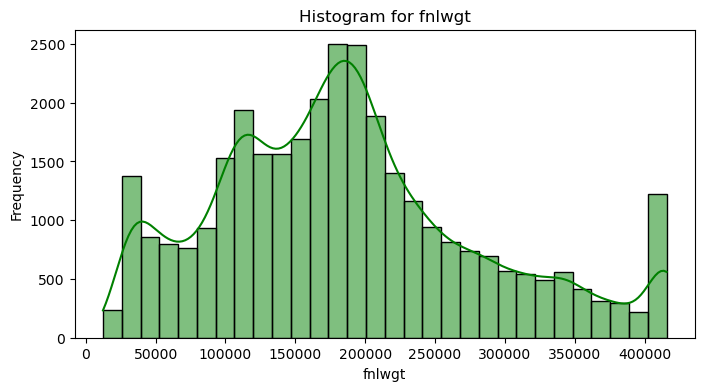

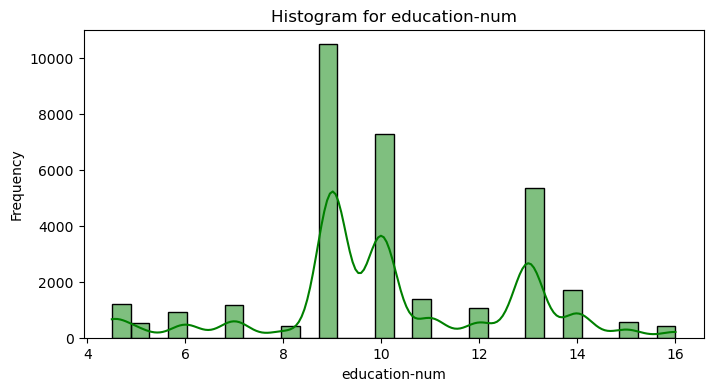

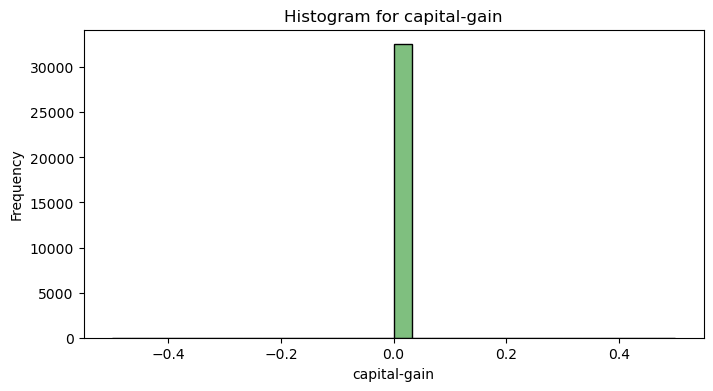

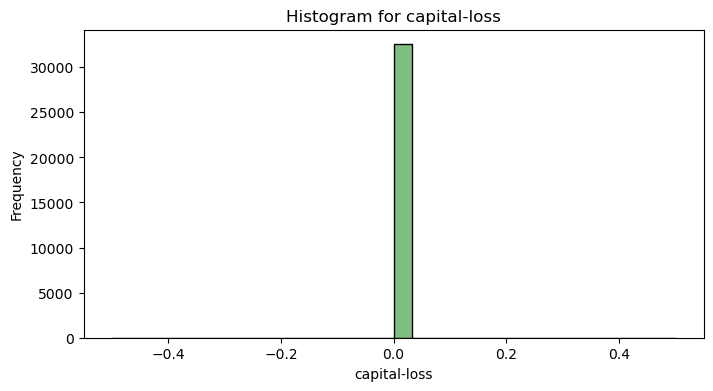

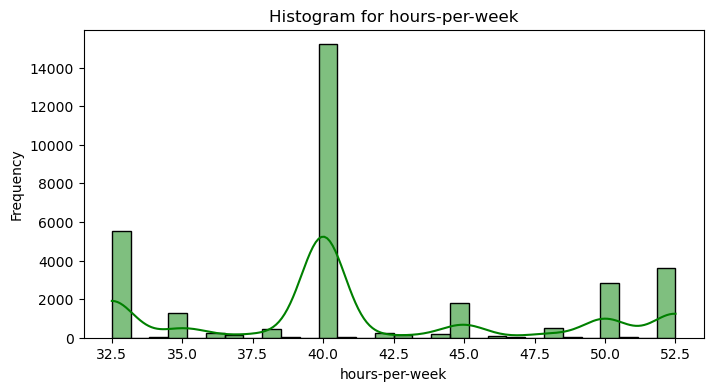

In [50]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=census_df, x=column, kde=True, bins=30,color='green')  # Histogram with KDE
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

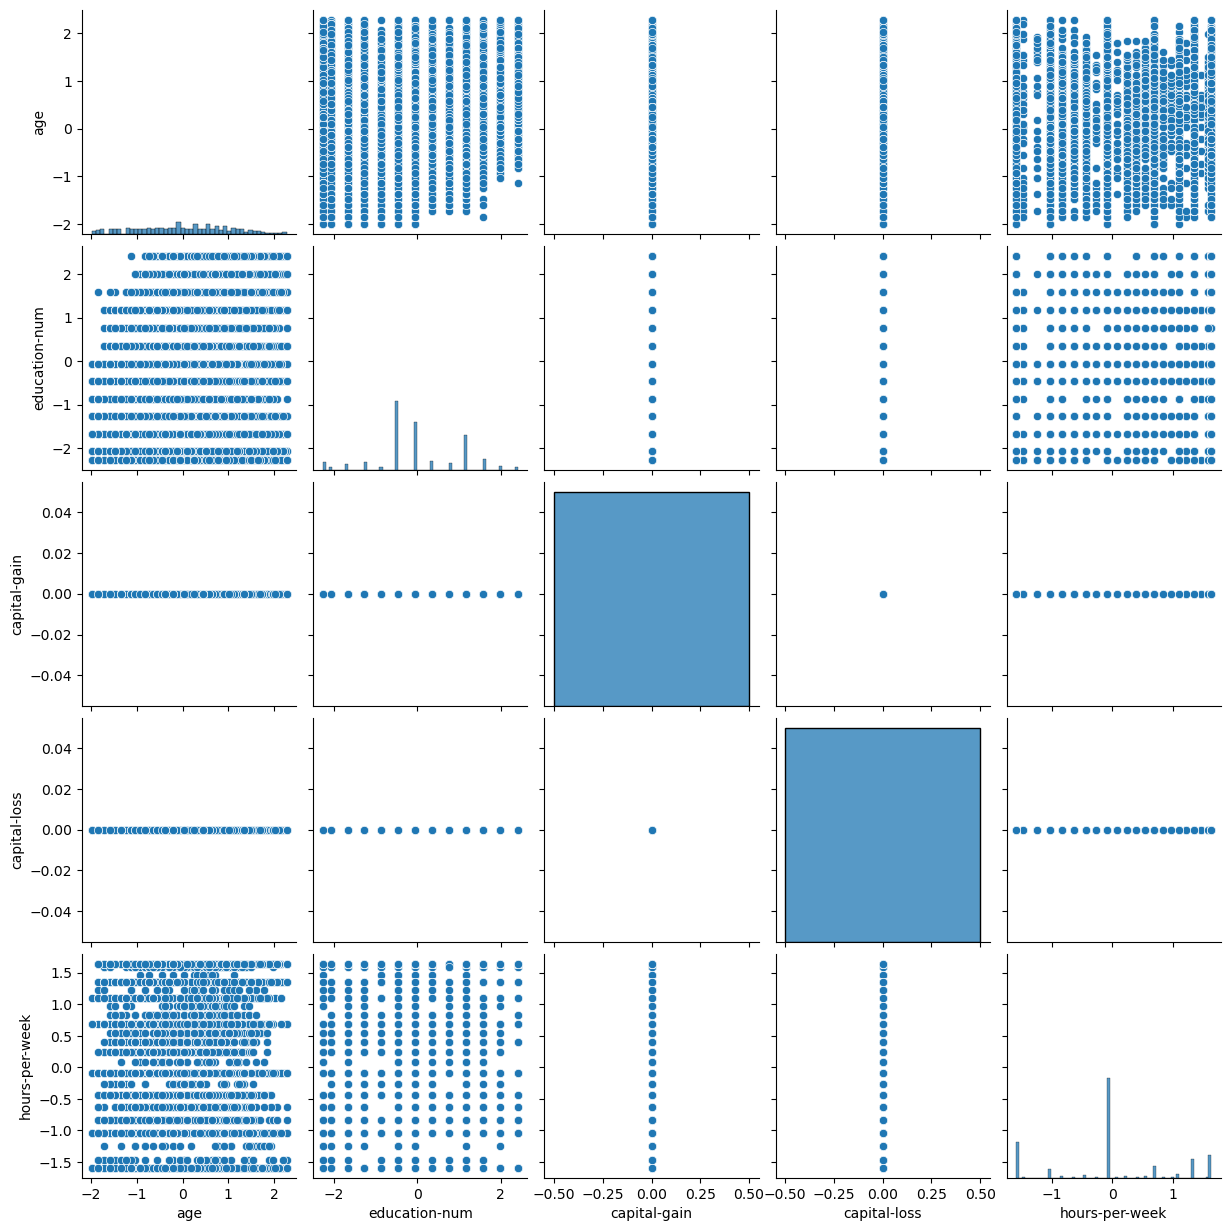

In [51]:
sns.pairplot(census_df1)

In [52]:
categorical_columns = census_df1.select_dtypes(include='object').columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

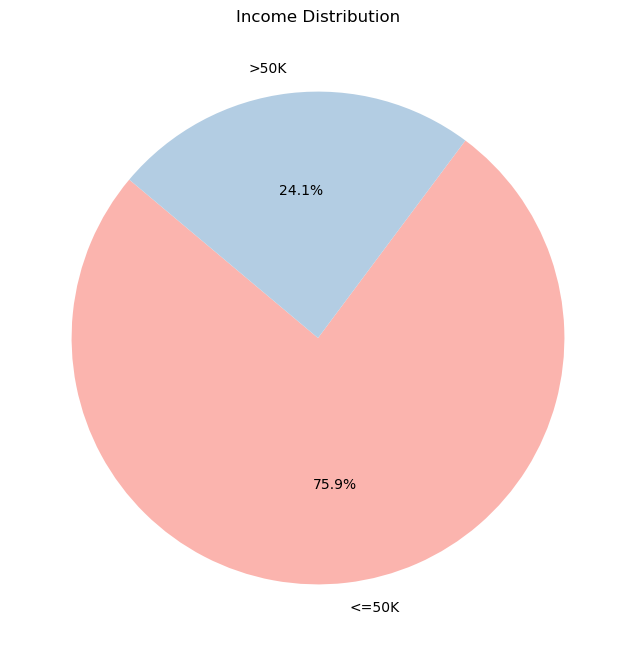

In [53]:
 #Pie Chart for Income Distribution
plt.figure(figsize=(8, 8))
income_counts = census_df1['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors )
plt.title('Income Distribution')
plt.show

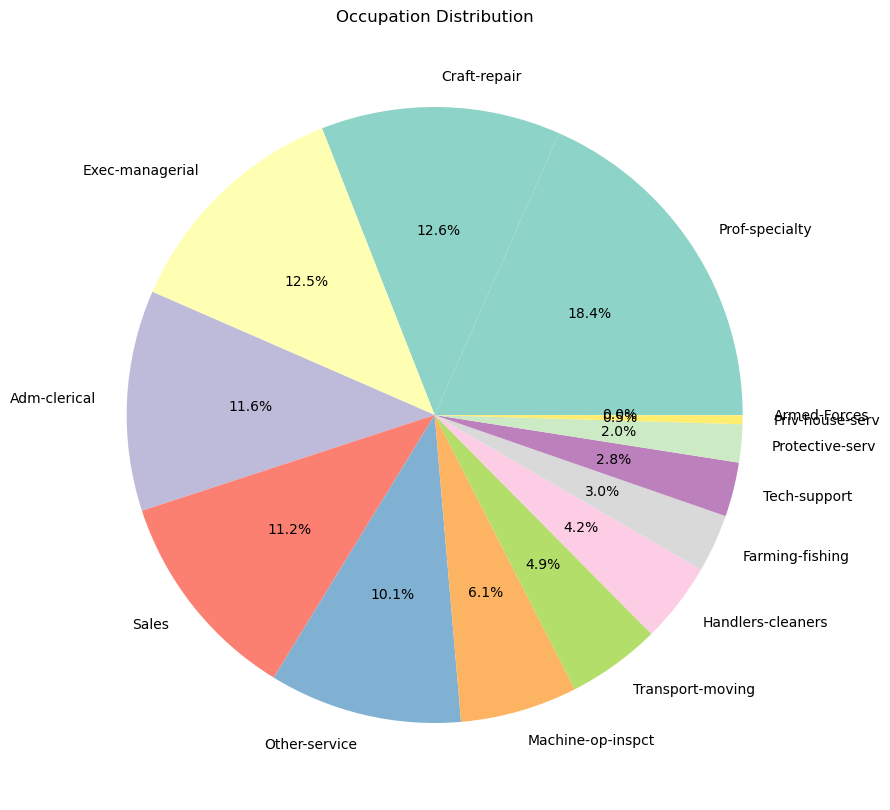

In [54]:
# Pie chart for occupation distribution
occupation_counts = census_df1['occupation'].value_counts()
occupation_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), colormap='Set3')
plt.title("Occupation Distribution")
plt.ylabel("")  # Remove default y-axis label
plt.show()


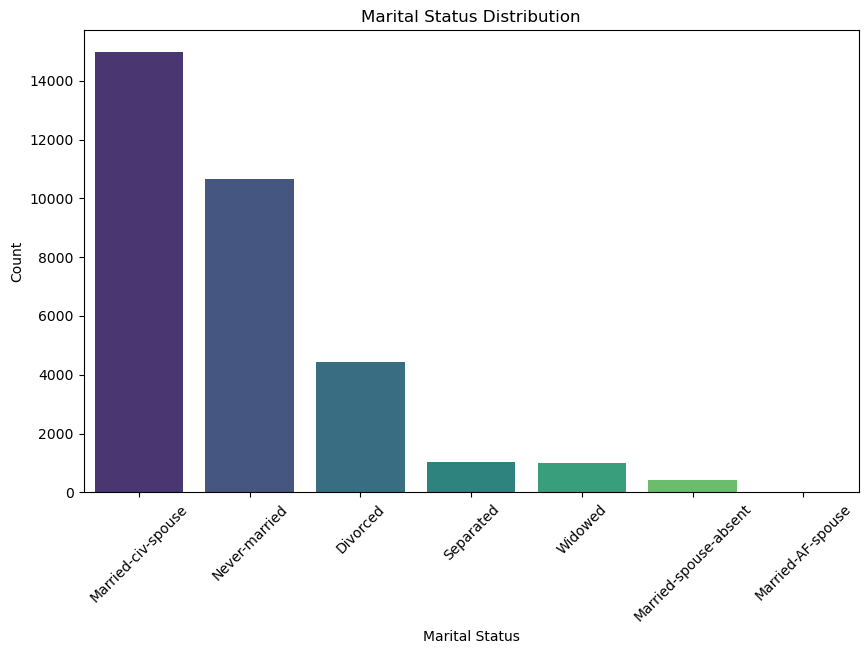

In [55]:
marital_status_counts = census_df1['marital-status'].value_counts()

# Step 2: Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='viridis')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

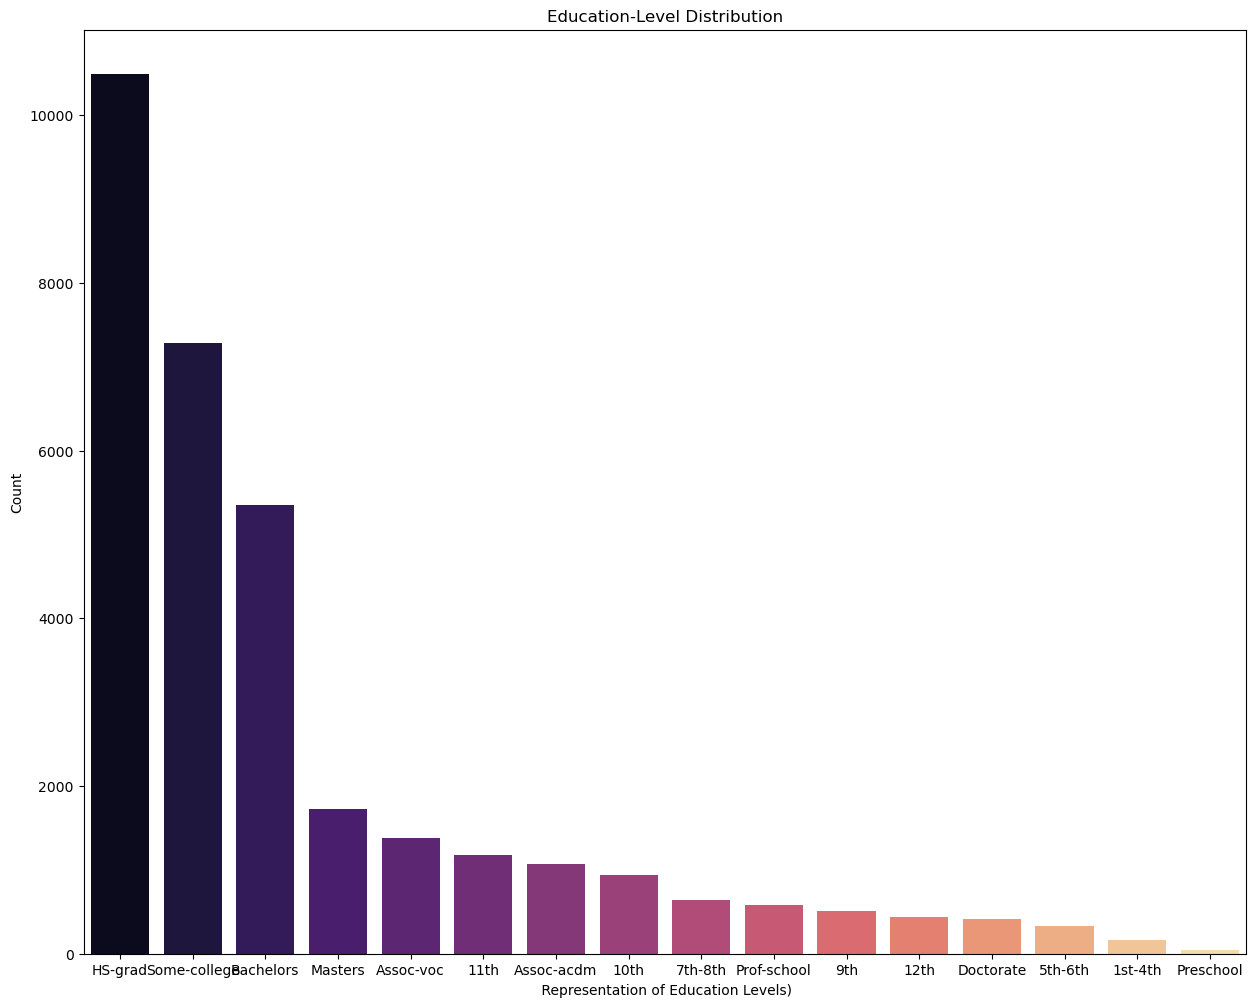

In [56]:
# Step 1: Count Plot for Education-level
plt.figure(figsize=(15, 12))
sns.countplot(data=census_df1, x='education', palette='magma', order=census_df1['education'].value_counts().index)
plt.title('Education-Level Distribution')
plt.xlabel(' Representation of Education Levels)')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='hours-per-week', ylabel='Density'>

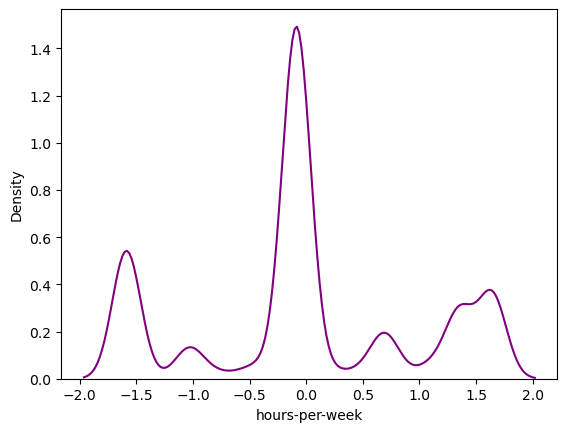

In [57]:
sns.kdeplot(census_df1['hours-per-week'],color='purple')

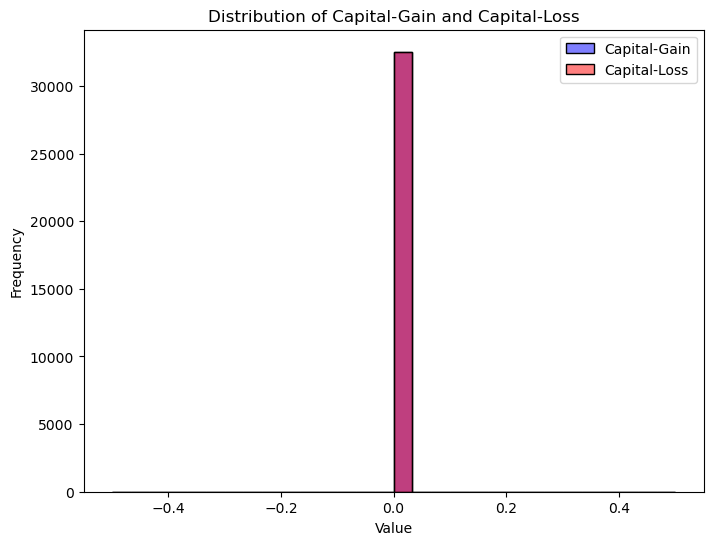

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(census_df1['capital-gain'], kde=True, color='blue', label='Capital-Gain', bins=30)
sns.histplot(census_df1['capital-loss'], kde=True, color='red', label='Capital-Loss', bins=30)
plt.title('Distribution of Capital-Gain and Capital-Loss')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


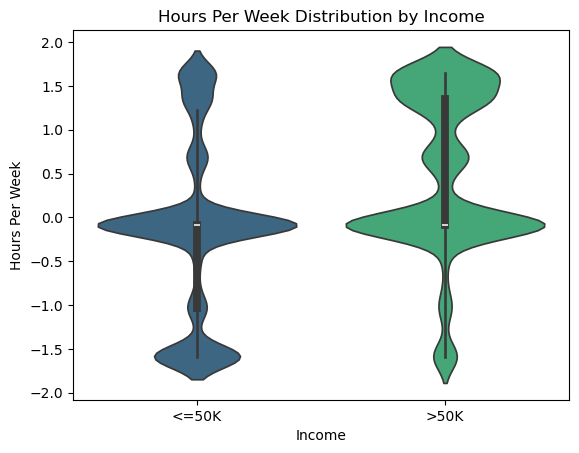

In [59]:
# Violin plot for hours-per-week grouped by income
sns.violinplot(x='income', y='hours-per-week', data=census_df1, palette='viridis')
plt.title("Hours Per Week Distribution by Income")
plt.xlabel("Income")
plt.ylabel("Hours Per Week")
plt.show()


<Axes: >

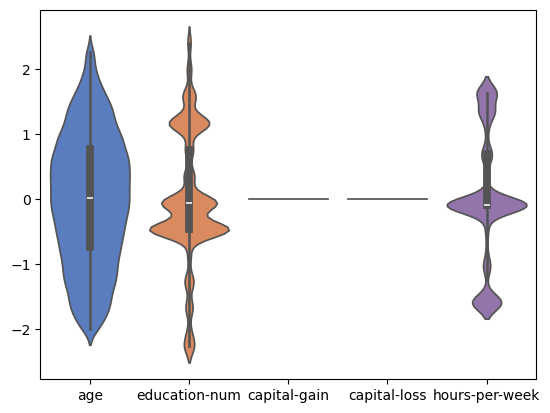

In [60]:
sns.violinplot(census_df1,palette='muted')

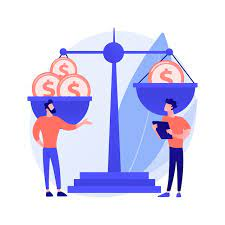

## FEATURE ENGINEERING

In [62]:
X = census_df1.drop('income', axis=1)
y = census_df1['income']

# Encode the target variable (income)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # <=50K -> 0, >50K -> 1


In [63]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.173466,State-gov,Bachelors,1.171644,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,-0.086927,United-States
1,0.894370,Self-emp-not-inc,Bachelors,1.171644,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,-1.588007,United-States
2,0.100091,Private,HS-grad,-0.462182,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,-0.086927,United-States
3,1.068490,Private,11th,-1.268562,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,-0.086927,United-States
4,-0.734740,Private,Bachelors,1.171644,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,-0.086927,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.830779,Private,Assoc-acdm,0.760914,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,-0.442557,United-States
32557,0.245342,Private,HS-grad,-0.462182,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,-0.086927,United-States
32558,1.341717,Private,HS-grad,-0.462182,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,-0.086927,United-States
32559,-1.358333,Private,HS-grad,-0.462182,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,-1.588007,United-States


In [65]:
X.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [66]:
numeric_col=X.select_dtypes(include=['number']).columns


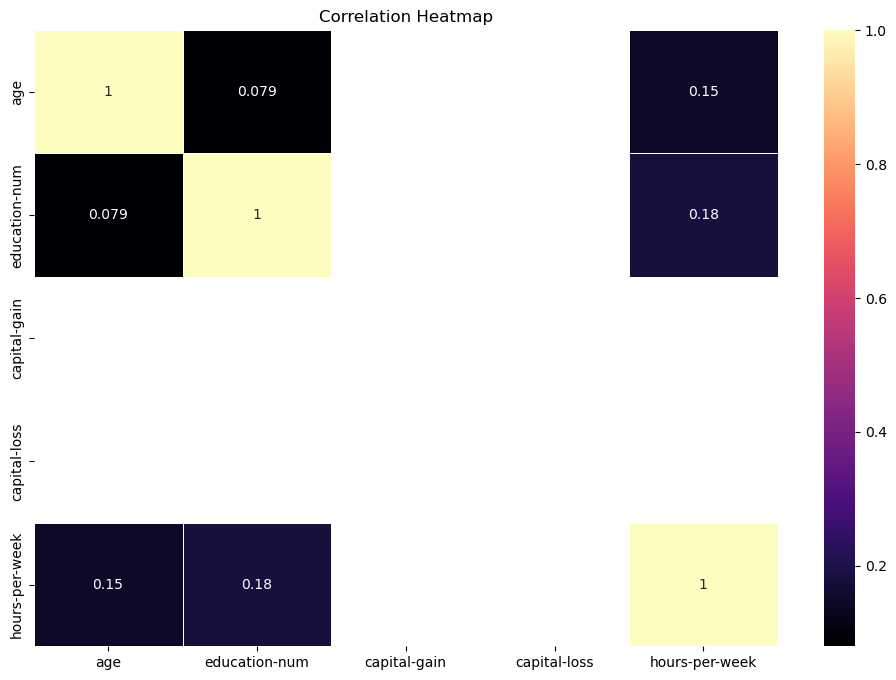

In [67]:
correlation_matrix = X[numeric_col].corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [68]:
categ_columns=X.select_dtypes(include=['object']).columns
print("categorical_columns:",categ_columns)

categorical_columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [69]:

# Perform one-hot encoding
X = pd.get_dummies(X, columns=categ_columns, drop_first=True)

# Verify the result
print("Shape of X after one-hot encoding:", X.shape)
print("First 5 rows of the transformed dataset:\n", X.head())


Shape of X after one-hot encoding: (32537, 96)
First 5 rows of the transformed dataset:
         age  education-num  capital-gain  capital-loss  hours-per-week  \
0  0.173466       1.171644           0.0           0.0       -0.086927   
1  0.894370       1.171644           0.0           0.0       -1.588007   
2  0.100091      -0.462182           0.0           0.0       -0.086927   
3  1.068490      -1.268562           0.0           0.0       -0.086927   
4 -0.734740       1.171644           0.0           0.0       -0.086927   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-i

In [70]:
# Check data types of all columns
print(X.dtypes)

# Convert boolean columns to integers or floats
for col in X.columns:
    if X[col].dtype == 'bool':  # Check if the column is boolean
        X[col] = X[col].astype(int)  # Convert to integers (1 and 0)
        

# Ensure no columns are categorical anymore
if X.select_dtypes(include='object').empty and X.select_dtypes(include='bool').empty:
    print("All columns are now numeric!")


age                               float64
education-num                     float64
capital-gain                      float64
capital-loss                      float64
hours-per-week                    float64
                                   ...   
native-country_Thailand              bool
native-country_Trinadad&Tobago       bool
native-country_United-States         bool
native-country_Vietnam               bool
native-country_Yugoslavia            bool
Length: 96, dtype: object
All columns are now numeric!


In [71]:
X.isnull().sum()

age                               0
education-num                     0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 96, dtype: int64

In [72]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.173466,1.171644,0.0,0.0,-0.086927,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.894370,1.171644,0.0,0.0,-1.588007,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.100091,-0.462182,0.0,0.0,-0.086927,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.068490,-1.268562,0.0,0.0,-0.086927,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.734740,1.171644,0.0,0.0,-0.086927,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.830779,0.760914,0.0,0.0,-0.442557,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.245342,-0.462182,0.0,0.0,-0.086927,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,1.341717,-0.462182,0.0,0.0,-0.086927,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,-1.358333,-0.462182,0.0,0.0,-1.588007,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
y

array([0, 0, 0, ..., 0, 0, 1])

## FEATURE SELECTION

In [75]:
# Train Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=42)

In [76]:

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

# Display the most important features
print(feature_importances)






                                           importance
marital-status_Married-civ-spouse            0.229534
education-num                                0.137067
marital-status_Never-married                 0.119526
age                                          0.075491
hours-per-week                               0.070346
...                                               ...
native-country_Nicaragua                     0.000000
workclass_Without-pay                        0.000000
capital-loss                                 0.000000
capital-gain                                 0.000000
native-country_Outlying-US(Guam-USVI-etc)    0.000000

[96 rows x 1 columns]


In [77]:
# Select top 10 features
top_n_features = feature_importances.head(10).index
print(f"Top 10 features: {top_n_features}")

Top 10 features: Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial'],
      dtype='object')


In [78]:
top_n_features = feature_importances.head(12).index # Top 12 features
X_selected = X[top_n_features]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [79]:
X_selected

,marital-status_Married-civ-spouse,education-num,marital-status_Never-married,age,hours-per-week,sex_Male,relationship_Not-in-family,education_Bachelors,relationship_Own-child,occupation_Exec-managerial,occupation_Other-service,education_Prof-school
0,0,1.171644,1,0.173466,-0.086927,1,1,1,0,0,0,0
1,1,1.171644,0,0.894370,-1.588007,1,0,1,0,1,0,0
2,0,-0.462182,0,0.100091,-0.086927,1,1,0,0,0,0,0
3,1,-1.268562,0,1.068490,-0.086927,1,0,0,0,0,0,0
4,1,1.171644,0,-0.734740,-0.086927,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0.760914,0,-0.830779,-0.442557,0,0,0,0,0,0,0
32557,1,-0.462182,0,0.245342,-0.086927,1,0,0,0,0,0,0
32558,0,-0.462182,0,1.341717,-0.086927,0,0,0,0,0,0,0
32559,0,-0.462182,1,-1.358333,-1.588007,1,0,0,1,0,0,0


In [80]:
#scaling 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [81]:
#after converting into dataframe,recheck shape of trained model

In [82]:
print("Training set shape (features):",X_train_scaled.shape)
print("Test set shape(features):",X_test_scaled.shape)
print("Training set shape(target):",y_train.shape)
print("Test set shape(target):",y_test.shape)

Training set shape (features): (26029, 12)
Test set shape(features): (6508, 12)
Training set shape(target): (26029,)
Test set shape(target): (6508,)


# TRAINING MODELS

In [84]:
print("\nTraining models...")
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42,max_depth=5),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=0.1,
                                    max_depth=3,
                                    random_state=42),
    
    'SVC': SVC(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    
    "Bagging classifier": BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0,
        
    

)}


Training models...


# MODEL EVALUATION

In [86]:
#calculate matrix values of each models using for loop

In [87]:


# Initialize the results dictionary
results = {}

for name, model in models.items():
    print(f"Training model: {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Model evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T  # Transpose to make models as rows
print("Model Evaluation Results:")
print(results_df)


Training model: LogisticRegression...
Training model: DecisionTreeClassifier...
Training model: RandomForestClassifier...
Training model: GradientBoostingClassifier...
Training model: SVC...
Training model: AdaBoostClassifier...
Training model: KNeighborsClassifier...
Training model: Bagging classifier...
Model Evaluation Results:
                            Accuracy  Precision    Recall  F1 Score
LogisticRegression          0.827136   0.779719  0.720698  0.741555
DecisionTreeClassifier      0.822987   0.789947  0.690439  0.717232
RandomForestClassifier      0.835894   0.796373  0.729868  0.753011
GradientBoostingClassifier  0.838353   0.789810  0.753127  0.768214
SVC                         0.831746   0.791583  0.720606  0.744359
AdaBoostClassifier          0.832207   0.784621  0.734561  0.753464
KNeighborsClassifier        0.810695   0.745587  0.728059  0.735862
Bagging classifier          0.814536   0.752531  0.723888  0.735786


In [88]:
#finding best model from the model list based on accuracy
best_model_name = max(results.items(), key=lambda x: x[1]['Accuracy'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: GradientBoostingClassifier


# CONFUSION MATRIX

Training names:LogisticRegression...


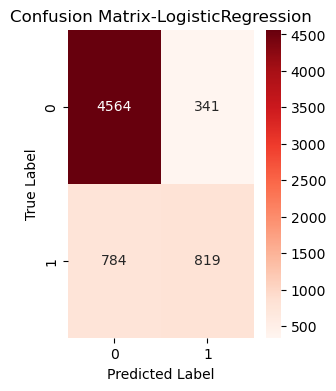

Training names:DecisionTreeClassifier...


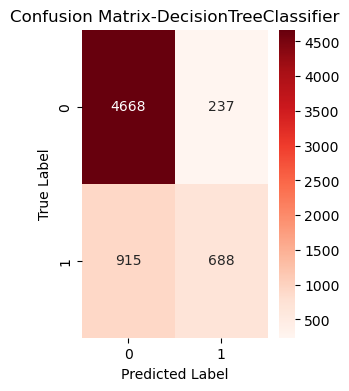

Training names:RandomForestClassifier...


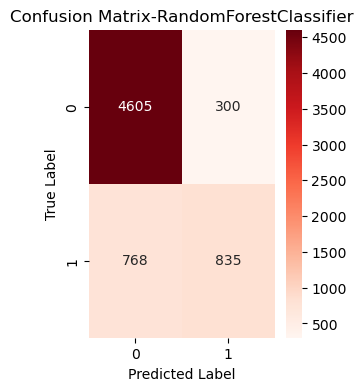

Training names:GradientBoostingClassifier...


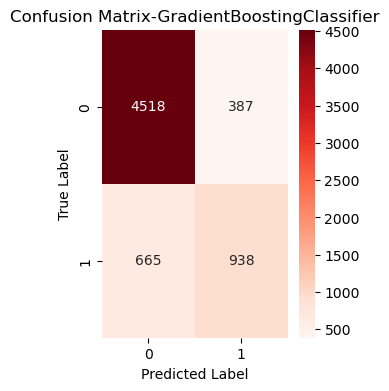

Training names:SVC...


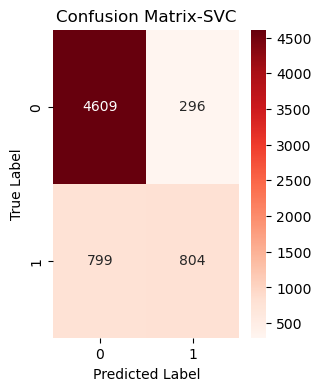

Training names:AdaBoostClassifier...


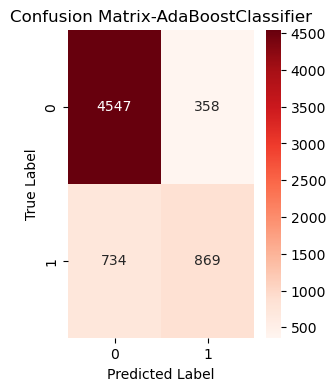

Training names:KNeighborsClassifier...


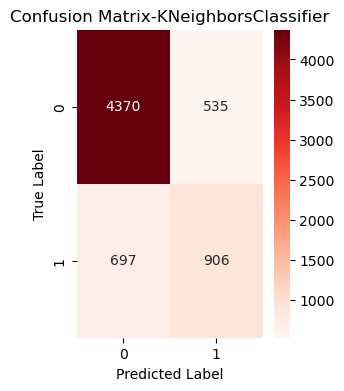

Training names:Bagging classifier...


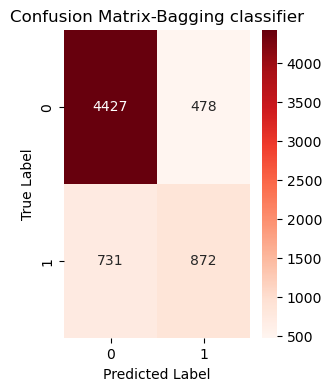

In [90]:
results={}
for name,model in models.items():
    print(f"Training names:{name}...")
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    #model Evaluation
    cm = confusion_matrix(y_test, y_pred)
    results[name]={
        
        'confusion_matrix': cm
    }
    plt.figure(figsize=(3,4))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
    plt.title(f'Confusion Matrix-{name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()  

# ROC CURVE

Training model: LogisticRegression...
ROC-AUC Score for LogisticRegression: 0.88


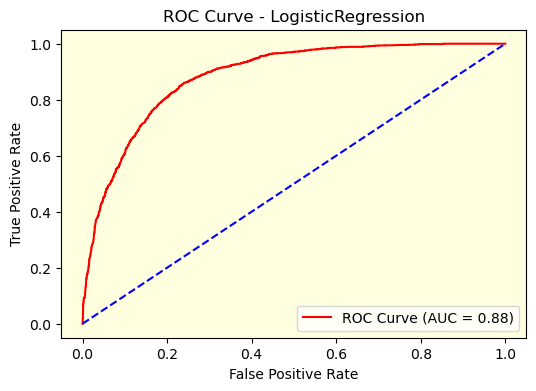

Training model: DecisionTreeClassifier...
ROC-AUC Score for DecisionTreeClassifier: 0.87


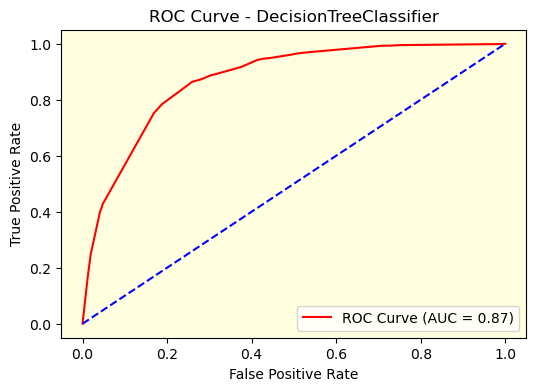

Training model: RandomForestClassifier...
ROC-AUC Score for RandomForestClassifier: 0.89


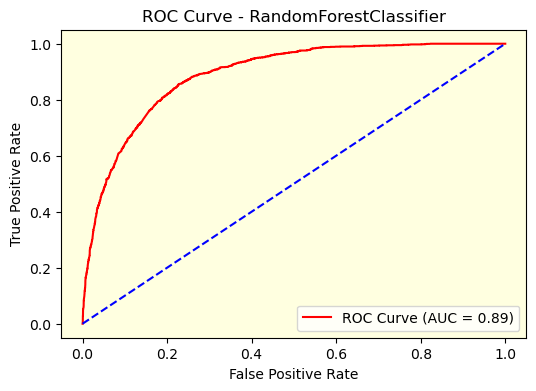

Training model: GradientBoostingClassifier...
ROC-AUC Score for GradientBoostingClassifier: 0.89


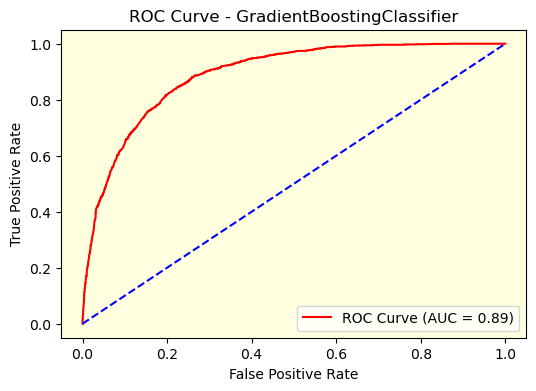

Training model: SVC...
SVC does not support predict_proba(). Skipping ROC-AUC evaluation.
Training model: AdaBoostClassifier...
ROC-AUC Score for AdaBoostClassifier: 0.89


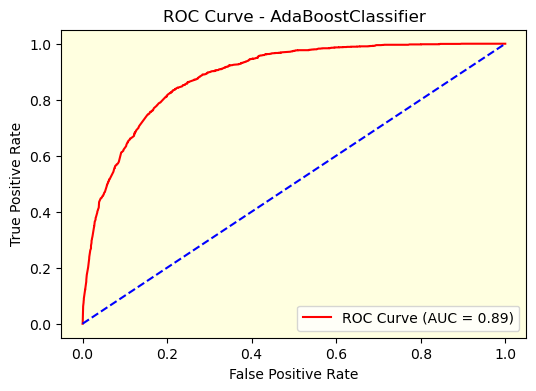

Training model: KNeighborsClassifier...
ROC-AUC Score for KNeighborsClassifier: 0.83


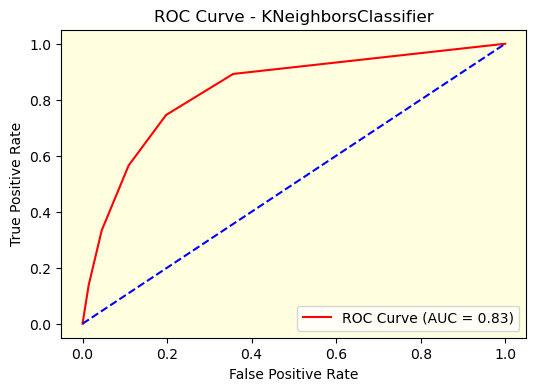

Training model: Bagging classifier...
ROC-AUC Score for Bagging classifier: 0.85


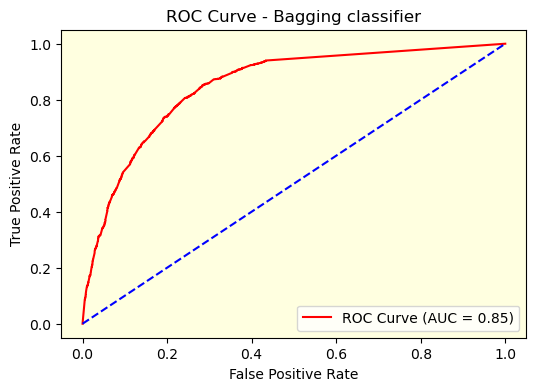


Summary of Model Performances:
LogisticRegression: ROC-AUC = 0.88
DecisionTreeClassifier: ROC-AUC = 0.87
RandomForestClassifier: ROC-AUC = 0.89
GradientBoostingClassifier: ROC-AUC = 0.89
AdaBoostClassifier: ROC-AUC = 0.89
KNeighborsClassifier: ROC-AUC = 0.83
Bagging classifier: ROC-AUC = 0.85


In [92]:
#ROC SCORE AND ROC CURVE
# Initialize results dictionary
results = {}

# Iterate over models
for name, model in models.items():
    print(f"Training model: {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict test set labels
    y_pred = model.predict(X_test_scaled)
    
    # Predict probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        print(f"{name} does not support predict_proba(). Skipping ROC-AUC evaluation.")
        continue
    
    # Model evaluation: ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC-AUC Score for {name}: {roc_auc:.2f}")
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Save results
    results[name] = {
        'ROC-AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.gca().set_facecolor('lightyellow')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Display all results
print("\nSummary of Model Performances:")
for name, metrics in results.items():
    print(f"{name}: ROC-AUC = {metrics['ROC-AUC']:.2f}")


# CLASSIFICATION REPORTS

In [94]:
#classification Report

for name, model in models.items():
    print(f"Training model: {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report
    print(f"Classification Report for {name}:\n")
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    print(report)
    print("-" * 50)  # Separator for better readability


Training model: LogisticRegression...
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

     Class 0       0.85      0.93      0.89      4905
     Class 1       0.71      0.51      0.59      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.72      0.74      6508
weighted avg       0.82      0.83      0.82      6508

--------------------------------------------------
Training model: DecisionTreeClassifier...
Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

     Class 0       0.84      0.95      0.89      4905
     Class 1       0.74      0.43      0.54      1603

    accuracy                           0.82      6508
   macro avg       0.79      0.69      0.72      6508
weighted avg       0.81      0.82      0.80      6508

--------------------------------------------------
Training model: RandomForestClassifier...
Classification Report fo

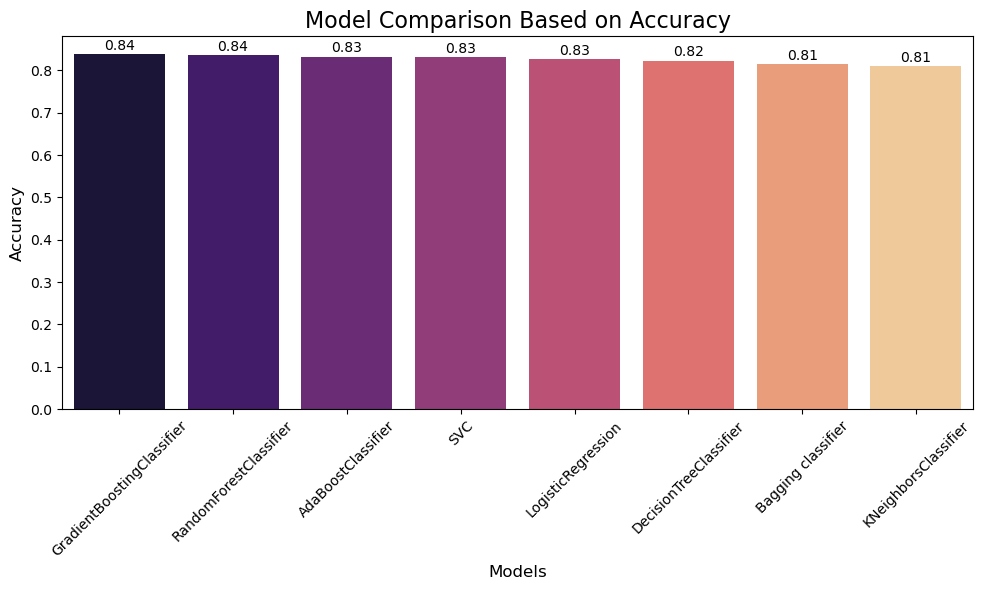

In [95]:
#Accuarcy Based Best Visualization

# Sort results based on accuracy
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False).reset_index()

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_sorted, x='index', y='Accuracy', palette='magma')

# Add titles and labels
plt.title('Model Comparison Based on Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)  # Rotate model names for better visibility

# Annotate the bar chart with accuracy values
for index, value in enumerate(results_df_sorted['Accuracy']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [96]:
# Train a GradientBoosting Model

In [97]:
best_model = GradientBoostingClassifier(random_state=42)#set as best model
best_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)

In [98]:
test_accuracy #test data model accuracy finding

0.8383527965580824

### HYPERPARAMETER TUNING

In [100]:
rf_model = RandomForestClassifier(random_state=42)

In [101]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 200],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

In [102]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Number of cross-validation folds
    verbose=2,  # Print progress
    n_jobs=-1   # Use all processors
)

In [103]:
grid_search.fit(X_train_scaled, y_train)
best_param=grid_search.best_params_
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (Accuracy): 0.8124399422053065


In [104]:
#evaluate the best model
#train the best model from grid search on the entire training data
best_model=GradientBoostingClassifier(**best_param,random_state=42)
best_model.fit(X_train_scaled,y_train)
#predict on the test data
y_test_pred=best_model.predict(X_test_scaled)
#Evaluate the model
test_f1=f1_score(y_test,y_test_pred)

print(f"F1:{test_f1}")

F1:0.5667574931880109


In [105]:
test_accuracy = accuracy_score(y_test, y_test_pred)  # Use accuracy_score function
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8045


# PIPELINE

In [107]:

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', GradientBoostingClassifier())           # Gradient Boosting Classifier
])
# Train the pipeline
pipeline.fit(X_train, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)



In [108]:
# Assuming X_train is a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now you can access column names
print(X_train_scaled_df.columns)


Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial',
       'occupation_Other-service', 'education_Prof-school'],
      dtype='object')


In [109]:
X_train.columns

Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial',
       'occupation_Other-service', 'education_Prof-school'],
      dtype='object')

In [110]:
pipeline.fit(X_train, y_train) #pipelin fitting

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [111]:
X_train.columns

Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial',
       'occupation_Other-service', 'education_Prof-school'],
      dtype='object')

In [112]:
y_pred=pipeline.predict(X_test)

In [113]:


# Save the entire pipeline
joblib.dump(pipeline, 'GradientBoosting_pipeline.joblib')

['GradientBoosting_pipeline.joblib']

In [114]:
# Load the pipeline
loaded_pipeline = joblib.load('GradientBoosting_pipeline.joblib')


### UNSEEN DATA PREDICTION

In [116]:
unseen = pd.read_csv('Income_unseen data.csv') #load unseen data

In [117]:
unseen.head()

,marital-status_Married-civ-spouse,education-num,marital-status_Never-married,age,hours-per-week,sex_Male,relationship_Not-in-family,education_Bachelors,relationship_Own-child,occupation_Exec-managerial,occupation_Other-service,education_Prof-school,y_actual
0,0,1.5400,1,0.173466,1.77007,1,1,1,0,0,0,0,0
1,1,1.2370,0,0.100091,1.56540,1,1,0,1,1,0,0,1
2,0,0.7621,0,0.734740,0.23500,1,0,0,1,0,0,0,0
3,0,1.1716,0,-0.086927,-1.34556,1,0,1,1,0,0,0,0
4,1,1.2370,1,-0.086927,0.12349,1,1,1,0,0,0,0,1


In [118]:
unseen.columns

Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial',
       'occupation_Other-service', 'education_Prof-school', 'y_actual'],
      dtype='object')

In [119]:
df_unseen=pd.DataFrame(data=unseen) #convert to Dataframe

In [120]:
X_unseen = df_unseen.drop('y_actual', axis=1)  # Drop the target column
y_actual = df_unseen['y_actual']  # The true target labels

In [121]:
y_prediction=pipeline.predict(X_unseen) #prediction based on X_unseen data

In [122]:
X_unseen.columns

Index(['marital-status_Married-civ-spouse', 'education-num',
       'marital-status_Never-married', 'age', 'hours-per-week', 'sex_Male',
       'relationship_Not-in-family', 'education_Bachelors',
       'relationship_Own-child', 'occupation_Exec-managerial',
       'occupation_Other-service', 'education_Prof-school'],
      dtype='object')

In [123]:
unseen['unseen_pred']=y_prediction # assign a column unseen pred

In [124]:
unseen.to_csv('unseenpred_income.csv',index=False) #save as csv file

In [125]:
predicted_unseen=pd.read_csv('unseenpred_income.csv') #read file

In [126]:
predicted_unseen.head()

,marital-status_Married-civ-spouse,education-num,marital-status_Never-married,age,hours-per-week,sex_Male,relationship_Not-in-family,education_Bachelors,relationship_Own-child,occupation_Exec-managerial,occupation_Other-service,education_Prof-school,y_actual,unseen_pred
0,0,1.5400,1,0.173466,1.77007,1,1,1,0,0,0,0,0,0
1,1,1.2370,0,0.100091,1.56540,1,1,0,1,1,0,0,1,1
2,0,0.7621,0,0.734740,0.23500,1,0,0,1,0,0,0,0,0
3,0,1.1716,0,-0.086927,-1.34556,1,0,1,1,0,0,0,0,0
4,1,1.2370,1,-0.086927,0.12349,1,1,1,0,0,0,0,1,1


# UNSEEN EVALUATION

In [128]:
# unseen metrices finding
test_accuracy = accuracy_score(y_actual,y_prediction)
test_precision = precision_score(y_actual, y_prediction, average='macro')
test_recall = recall_score(y_actual, y_prediction, average='macro')
test_f1 = f1_score(y_actual, y_prediction, average='macro')

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precesion: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1: {test_f1:.2f}")

Test Accuracy: 0.71
Test Precesion: 0.71
Test Recall: 0.71
Test F1: 0.71


In [129]:
#  Print results
print("Predictions for Unseen Data:",y_prediction)
print("\nTrue Labels for Unseen Data:", y_actual)
print(f"Accuracy on Unseen Data: {test_accuracy:.2f}")

Predictions for Unseen Data: [0 1 0 0 1 0 1]

True Labels for Unseen Data: 0    0
1    1
2    0
3    0
4    1
5    1
6    0
Name: y_actual, dtype: int64
Accuracy on Unseen Data: 0.71


### Prediction vs actual Visualization

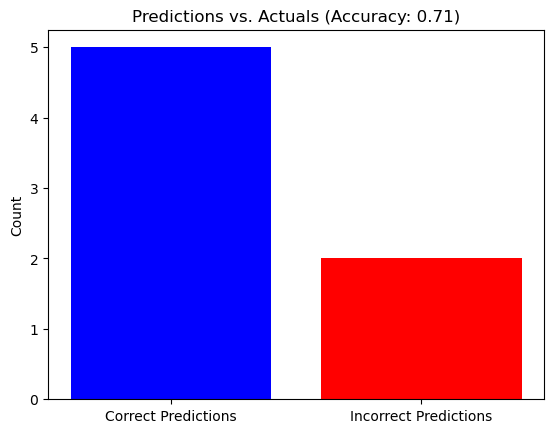

In [131]:
# Count correct predictions
correct = np.sum(np.array(y_prediction) == np.array(y_actual))
incorrect = len(y_actual) - correct

# Bar plot
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct, incorrect]

plt.bar(labels, values, color=['blue', 'red'])
plt.title(f"Predictions vs. Actuals (Accuracy: {test_accuracy:.2f})")
plt.ylabel("Count")
plt.show()

# CONCLUSION:
In this project, we developed and evaluated a machine learning pipeline to predict income categories (<=50K and >50K) based on demographic and professional features. The pipeline incorporated preprocessing, feature scaling, and model training, ensuring a streamlined and reproducible workflow.

# LIMITATIONS:
* some data limitations are included here
Class Imbalance: The dataset may have an unequal distribution of income groups, leading to biased predictions toward the majority class.
Feature Quality: Some features in the dataset might be incomplete, irrelevant, or not representative of the problem, reducing the model’s predictive power.
Static Dataset: The dataset is static and may not reflect real-world dynamics, such as changes in economic conditions or societal trends.

### FUTURE WORK:
* REAL WORLD
The model's predictions can help businesses or organizations in decision-making processes, such as targeted marketing, resource allocation, or policy planning.
Income Prediction: The model can be applied in social and economic research to predict income levels of individuals, helping governments and NGOs to identify vulnerable populations.

Targeted Marketing: Companies can use the insights from the model to design marketing strategies tailored to specific income groups, improving conversion rates.

Financial Planning: Financial institutions can utilize the model to offer personalized services like loans or investment plans based on predicted income brackets.

* Business Insights

Employee Analytics: In HR analytics, the project can be adapted to predict employee retention or performance based on income and other features, aiding decision-making.
Resource Allocation: Businesses can use the model for resource planning, ensuring efficient allocation based on employee or customer demographics.

* Research and Policy Development

Economic Studies: Researchers can use the model to study trends in income inequality and their correlations with demographic features, contributing to policy-making.
Tax Policy Analysis: Governments can simulate the effects of different tax policies on various income groups, promoting equitable tax systems.

* Technological Advancements
AI-Powered Applications: The model can be integrated into AI-based platforms to provide real-time income predictions in apps or websites.
Cross-Domain Generalization: The project can be adapted for other domains like healthcare, education, or fraud detection, showcasing its versatility.

